In [1]:
import pandas as pd
import numpy as np
import pickle

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Concatenate

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Embedding, Bidirectional, TimeDistributed, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dropout
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Embedding, Bidirectional, TimeDistributed, Reshape
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import mean_absolute_error, r2_score
from keras.regularizers import l2

ModuleNotFoundError: No module named 'wrapt'

In [29]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.list_physical_devices('GPU') 

[]

In [30]:
DF_MRI = pd.read_excel(open('./datasets/Our Dataset.xlsx', 'rb'),
              sheet_name='Data organized fluoro-monomer') 

In [31]:
print(DF_MRI)

      VPA   QJ2   QJ3  FDH3    LX  ZDH1  T50
0    0.46  0.00  0.08   0.0  0.00  0.46  609
1    0.26  0.00  0.60   0.0  0.00  0.14  629
2    0.61  0.00  0.21   0.0  0.00  0.18  570
3    0.75  0.00  0.13   0.0  0.00  0.12  492
4    0.15  0.00  0.74   0.0  0.00  0.11  540
..    ...   ...   ...   ...   ...   ...  ...
175  0.26  0.47  0.00   0.0  0.27  0.00  523
176  0.16  0.24  0.00   0.0  0.60  0.00  400
177  0.13  0.37  0.00   0.0  0.50  0.00  420
178  0.13  0.50  0.00   0.0  0.37  0.00  427
179  0.26  0.35  0.00   0.0  0.39  0.00  583

[180 rows x 7 columns]


In [32]:
my_structure_dataset = [
    [0, 0, 1, 3, 1, 0, 0, 2, 2, 2, 0, 1],
    [0, 1, 0, 1, 1, 0, 0, 1, 2, 3, 0, 1],
    [0, 1, 0, 4, 1, 0, 0, 3, 2, 7, 0, 1],
    [1, 1, 0, 4, 1, 0, 0, 5, 4, 7, 0, 1],
    [0, 0, 1, 5, 1, 1, 0, 6, 3, 11, 1, 1],
    [0, 0, 0, 2, 1, 1, 1, 3, 2, 8, 0, 1]
]
X=pd.DataFrame(my_structure_dataset)
Flag = [i != 'X' for i in DF_MRI['T50']]
print(DF_MRI[Flag])

      VPA   QJ2   QJ3  FDH3    LX  ZDH1  T50
0    0.46  0.00  0.08   0.0  0.00  0.46  609
1    0.26  0.00  0.60   0.0  0.00  0.14  629
2    0.61  0.00  0.21   0.0  0.00  0.18  570
3    0.75  0.00  0.13   0.0  0.00  0.12  492
4    0.15  0.00  0.74   0.0  0.00  0.11  540
..    ...   ...   ...   ...   ...   ...  ...
175  0.26  0.47  0.00   0.0  0.27  0.00  523
176  0.16  0.24  0.00   0.0  0.60  0.00  400
177  0.13  0.37  0.00   0.0  0.50  0.00  420
178  0.13  0.50  0.00   0.0  0.37  0.00  427
179  0.26  0.35  0.00   0.0  0.39  0.00  583

[180 rows x 7 columns]


In [33]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,1,3,1,0,0,2,2,2,0,1
1,0,1,0,1,1,0,0,1,2,3,0,1
2,0,1,0,4,1,0,0,3,2,7,0,1
3,1,1,0,4,1,0,0,5,4,7,0,1
4,0,0,1,5,1,1,0,6,3,11,1,1
5,0,0,0,2,1,1,1,3,2,8,0,1


In [34]:
Mix_X_6Block = []
for i in range(len(DF_MRI[Flag])):
        Sequency_X = np.zeros((6, 12))
        for j in range(6):
            Sequency_X[j]=X.iloc[j]*DF_MRI.iloc[i,j]

        #print(i)
        #print(Sequency_X)
        Mix_X_6Block.append(Sequency_X)

In [35]:
Mix_X_6Block= np.array(Mix_X_6Block)
Mix_X_6Block.shape

(180, 6, 12)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Mix_X_6Block, DF_MRI[Flag]['T50'].astype(np.float64), test_size=0.2, random_state=11)

In [37]:
def getRNNmodel(LSTMunits):

    RNNmodel = Sequential()
    RNNmodel.add(Bidirectional(LSTM(LSTMunits, return_sequences=True), input_shape=(6,12)))
    RNNmodel.add(Bidirectional(LSTM(LSTMunits, return_sequences=True)))
    RNNmodel.add(TimeDistributed(Dense(int(LSTMunits/2), activation="relu")))
    RNNmodel.add(Reshape((int(LSTMunits/2*6),)))
    RNNmodel.add(Dense(1))
    

    return RNNmodel

X_train = np.array(X_train)
y_train = np.array(y_train)

LSTMunits = 50
RNNmodel = getRNNmodel(LSTMunits)
RNNmodel.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
Model = RNNmodel.fit(X_train, y_train, validation_split=0.2, epochs=1000, \
                        batch_size=64)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x000001A7C9D8CAC0>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__train_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | |

2/2 [==============================] - 6s 1s/step - loss: 354702.7500 - mean_squared_error: 354702.7500 - val_loss: 317924.2188 - val_mean_squared_error: 317924.2188
Epoch 2/1000
2/2 [==============================] - 0s 30ms/step - loss: 354501.9062 - mean_squared_error: 354501.9062 - val_loss: 317748.0938 - val_mean_squared_error: 317748.0938
Epoch 3/1000
2/2 [==============================] - 0s 44ms/step - loss: 354318.5938 - mean_squared_error: 354318.5938 - val_loss: 317558.2812 - val_mean_squared_error: 317558.2812
Epoch 4/1000
2/2 [==============================] - 0s 42ms/step - loss: 354109.2812 - mean_squared_error: 354109.2812 - val_loss: 317305.8750 - val_mean_squared_error: 317305.8750
Epoch 5/1000
2/2 [==============================] - 0s 31ms/step - loss: 353820.6562 - mean_squared_error: 353820.6562 - val_loss: 316967.5625 - val_mean_squared_error: 316967.5625
Epoch 6/1000
2/2 [==============================] - 0s 30ms/step - loss: 353443.7500 - mean_squared_error: 353

Epoch 92/1000
2/2 [==============================] - 0s 56ms/step - loss: 20443.4277 - mean_squared_error: 20443.4277 - val_loss: 9148.2588 - val_mean_squared_error: 9148.2588
Epoch 93/1000
2/2 [==============================] - 0s 55ms/step - loss: 19428.7676 - mean_squared_error: 19428.7676 - val_loss: 8473.8193 - val_mean_squared_error: 8473.8193
Epoch 94/1000
2/2 [==============================] - 0s 42ms/step - loss: 18515.9023 - mean_squared_error: 18515.9023 - val_loss: 7876.0894 - val_mean_squared_error: 7876.0894
Epoch 95/1000
2/2 [==============================] - 0s 41ms/step - loss: 17639.7559 - mean_squared_error: 17639.7559 - val_loss: 7353.4546 - val_mean_squared_error: 7353.4546
Epoch 96/1000
2/2 [==============================] - 0s 55ms/step - loss: 16882.6738 - mean_squared_error: 16882.6738 - val_loss: 6896.2617 - val_mean_squared_error: 6896.2617
Epoch 97/1000
2/2 [==============================] - 0s 34ms/step - loss: 16200.3232 - mean_squared_error: 16200.3232 - 

2/2 [==============================] - 0s 67ms/step - loss: 11063.2900 - mean_squared_error: 11063.2900 - val_loss: 5404.0830 - val_mean_squared_error: 5404.0830
Epoch 185/1000
2/2 [==============================] - 0s 58ms/step - loss: 11065.8252 - mean_squared_error: 11065.8252 - val_loss: 5398.4707 - val_mean_squared_error: 5398.4707
Epoch 186/1000
2/2 [==============================] - 0s 58ms/step - loss: 11066.4912 - mean_squared_error: 11066.4912 - val_loss: 5401.6821 - val_mean_squared_error: 5401.6821
Epoch 187/1000
2/2 [==============================] - 0s 57ms/step - loss: 11064.8047 - mean_squared_error: 11064.8047 - val_loss: 5414.4438 - val_mean_squared_error: 5414.4438
Epoch 188/1000
2/2 [==============================] - 0s 49ms/step - loss: 11063.2158 - mean_squared_error: 11063.2158 - val_loss: 5429.3018 - val_mean_squared_error: 5429.3018
Epoch 189/1000
2/2 [==============================] - 0s 43ms/step - loss: 11061.7432 - mean_squared_error: 11061.7432 - val_loss:

2/2 [==============================] - 0s 46ms/step - loss: 10977.1826 - mean_squared_error: 10977.1826 - val_loss: 5346.5503 - val_mean_squared_error: 5346.5503
Epoch 277/1000
2/2 [==============================] - 0s 50ms/step - loss: 10974.5908 - mean_squared_error: 10974.5908 - val_loss: 5351.0156 - val_mean_squared_error: 5351.0156
Epoch 278/1000
2/2 [==============================] - 0s 51ms/step - loss: 10973.3857 - mean_squared_error: 10973.3857 - val_loss: 5356.6450 - val_mean_squared_error: 5356.6450
Epoch 279/1000
2/2 [==============================] - 0s 53ms/step - loss: 10972.4336 - mean_squared_error: 10972.4336 - val_loss: 5361.6094 - val_mean_squared_error: 5361.6094
Epoch 280/1000
2/2 [==============================] - 0s 69ms/step - loss: 10973.8740 - mean_squared_error: 10973.8740 - val_loss: 5368.7676 - val_mean_squared_error: 5368.7676
Epoch 281/1000
2/2 [==============================] - 0s 59ms/step - loss: 10972.0039 - mean_squared_error: 10972.0039 - val_loss:

2/2 [==============================] - 0s 41ms/step - loss: 9688.0674 - mean_squared_error: 9688.0674 - val_loss: 3982.3357 - val_mean_squared_error: 3982.3357
Epoch 369/1000
2/2 [==============================] - 0s 39ms/step - loss: 9570.9307 - mean_squared_error: 9570.9307 - val_loss: 3892.8000 - val_mean_squared_error: 3892.8000
Epoch 370/1000
2/2 [==============================] - 0s 49ms/step - loss: 9446.7939 - mean_squared_error: 9446.7939 - val_loss: 3908.2058 - val_mean_squared_error: 3908.2058
Epoch 371/1000
2/2 [==============================] - 0s 43ms/step - loss: 9290.0908 - mean_squared_error: 9290.0908 - val_loss: 3998.1743 - val_mean_squared_error: 3998.1743
Epoch 372/1000
2/2 [==============================] - 0s 42ms/step - loss: 9116.3965 - mean_squared_error: 9116.3965 - val_loss: 4154.8564 - val_mean_squared_error: 4154.8564
Epoch 373/1000
2/2 [==============================] - 0s 52ms/step - loss: 8971.9346 - mean_squared_error: 8971.9346 - val_loss: 4279.5728 -

Epoch 415/1000
2/2 [==============================] - 0s 59ms/step - loss: 7960.2144 - mean_squared_error: 7960.2134 - val_loss: 4988.4858 - val_mean_squared_error: 4988.4858
Epoch 416/1000
2/2 [==============================] - 0s 65ms/step - loss: 7965.3125 - mean_squared_error: 7965.3120 - val_loss: 4813.4658 - val_mean_squared_error: 4813.4658
Epoch 417/1000
2/2 [==============================] - 0s 49ms/step - loss: 7961.8911 - mean_squared_error: 7961.8911 - val_loss: 5569.0654 - val_mean_squared_error: 5569.0654
Epoch 418/1000
2/2 [==============================] - 0s 55ms/step - loss: 7905.1968 - mean_squared_error: 7905.1968 - val_loss: 5636.5259 - val_mean_squared_error: 5636.5259
Epoch 419/1000
2/2 [==============================] - 0s 50ms/step - loss: 7882.5273 - mean_squared_error: 7882.5273 - val_loss: 5571.3223 - val_mean_squared_error: 5571.3223
Epoch 420/1000
2/2 [==============================] - 0s 58ms/step - loss: 7836.3521 - mean_squared_error: 7836.3521 - val_lo

Epoch 462/1000
2/2 [==============================] - 0s 57ms/step - loss: 7170.7686 - mean_squared_error: 7170.7686 - val_loss: 5712.9033 - val_mean_squared_error: 5712.9033
Epoch 463/1000
2/2 [==============================] - 0s 49ms/step - loss: 7313.4185 - mean_squared_error: 7313.4185 - val_loss: 5128.1655 - val_mean_squared_error: 5128.1655
Epoch 464/1000
2/2 [==============================] - 0s 56ms/step - loss: 7207.3267 - mean_squared_error: 7207.3267 - val_loss: 4348.1982 - val_mean_squared_error: 4348.1982
Epoch 465/1000
2/2 [==============================] - 0s 63ms/step - loss: 7496.2412 - mean_squared_error: 7496.2412 - val_loss: 5318.9907 - val_mean_squared_error: 5318.9907
Epoch 466/1000
2/2 [==============================] - 0s 57ms/step - loss: 7244.5356 - mean_squared_error: 7244.5356 - val_loss: 5317.6333 - val_mean_squared_error: 5317.6333
Epoch 467/1000
2/2 [==============================] - 0s 65ms/step - loss: 6992.9731 - mean_squared_error: 6992.9741 - val_lo

Epoch 509/1000
2/2 [==============================] - 0s 54ms/step - loss: 6710.2163 - mean_squared_error: 6710.2163 - val_loss: 5280.6401 - val_mean_squared_error: 5280.6401
Epoch 510/1000
2/2 [==============================] - 0s 41ms/step - loss: 6707.1914 - mean_squared_error: 6707.1914 - val_loss: 5328.9561 - val_mean_squared_error: 5328.9561
Epoch 511/1000
2/2 [==============================] - 0s 45ms/step - loss: 6707.9346 - mean_squared_error: 6707.9346 - val_loss: 5336.1455 - val_mean_squared_error: 5336.1455
Epoch 512/1000
2/2 [==============================] - 0s 68ms/step - loss: 6699.3022 - mean_squared_error: 6699.3018 - val_loss: 5230.8818 - val_mean_squared_error: 5230.8818
Epoch 513/1000
2/2 [==============================] - 0s 37ms/step - loss: 6683.2847 - mean_squared_error: 6683.2847 - val_loss: 5158.7749 - val_mean_squared_error: 5158.7749
Epoch 514/1000
2/2 [==============================] - 0s 59ms/step - loss: 6677.5273 - mean_squared_error: 6677.5269 - val_lo

Epoch 556/1000
2/2 [==============================] - 0s 49ms/step - loss: 6341.0981 - mean_squared_error: 6341.0981 - val_loss: 6045.9121 - val_mean_squared_error: 6045.9121
Epoch 557/1000
2/2 [==============================] - 0s 66ms/step - loss: 6318.9990 - mean_squared_error: 6318.9990 - val_loss: 5965.7798 - val_mean_squared_error: 5965.7798
Epoch 558/1000
2/2 [==============================] - 0s 50ms/step - loss: 6318.2554 - mean_squared_error: 6318.2554 - val_loss: 5980.2197 - val_mean_squared_error: 5980.2197
Epoch 559/1000
2/2 [==============================] - 0s 56ms/step - loss: 6308.4434 - mean_squared_error: 6308.4434 - val_loss: 6088.9912 - val_mean_squared_error: 6088.9912
Epoch 560/1000
2/2 [==============================] - 0s 73ms/step - loss: 6291.4888 - mean_squared_error: 6291.4888 - val_loss: 6167.4414 - val_mean_squared_error: 6167.4414
Epoch 561/1000
2/2 [==============================] - 0s 66ms/step - loss: 6315.1807 - mean_squared_error: 6315.1807 - val_lo

Epoch 603/1000
2/2 [==============================] - 0s 56ms/step - loss: 6005.6577 - mean_squared_error: 6005.6577 - val_loss: 6951.3311 - val_mean_squared_error: 6951.3311
Epoch 604/1000
2/2 [==============================] - 0s 65ms/step - loss: 6012.0254 - mean_squared_error: 6012.0254 - val_loss: 6876.3081 - val_mean_squared_error: 6876.3081
Epoch 605/1000
2/2 [==============================] - 0s 64ms/step - loss: 5979.4038 - mean_squared_error: 5979.4038 - val_loss: 6698.0415 - val_mean_squared_error: 6698.0415
Epoch 606/1000
2/2 [==============================] - 0s 50ms/step - loss: 6023.4858 - mean_squared_error: 6023.4863 - val_loss: 6841.7231 - val_mean_squared_error: 6841.7231
Epoch 607/1000
2/2 [==============================] - 0s 30ms/step - loss: 5974.1284 - mean_squared_error: 5974.1284 - val_loss: 7056.7720 - val_mean_squared_error: 7056.7720
Epoch 608/1000
2/2 [==============================] - 0s 58ms/step - loss: 6036.4248 - mean_squared_error: 6036.4248 - val_lo

Epoch 650/1000
2/2 [==============================] - 0s 54ms/step - loss: 5715.3394 - mean_squared_error: 5715.3394 - val_loss: 5997.3057 - val_mean_squared_error: 5997.3057
Epoch 651/1000
2/2 [==============================] - 0s 59ms/step - loss: 5717.4580 - mean_squared_error: 5717.4580 - val_loss: 6124.1162 - val_mean_squared_error: 6124.1162
Epoch 652/1000
2/2 [==============================] - 0s 56ms/step - loss: 5703.1978 - mean_squared_error: 5703.1978 - val_loss: 6314.2920 - val_mean_squared_error: 6314.2920
Epoch 653/1000
2/2 [==============================] - 0s 51ms/step - loss: 5699.6313 - mean_squared_error: 5699.6313 - val_loss: 6334.8779 - val_mean_squared_error: 6334.8779
Epoch 654/1000
2/2 [==============================] - 0s 63ms/step - loss: 5688.4795 - mean_squared_error: 5688.4795 - val_loss: 6241.8286 - val_mean_squared_error: 6241.8286
Epoch 655/1000
2/2 [==============================] - 0s 50ms/step - loss: 5676.4307 - mean_squared_error: 5676.4307 - val_lo

Epoch 697/1000
2/2 [==============================] - 0s 58ms/step - loss: 5467.4229 - mean_squared_error: 5467.4229 - val_loss: 7405.5410 - val_mean_squared_error: 7405.5410
Epoch 698/1000
2/2 [==============================] - 0s 63ms/step - loss: 5494.1782 - mean_squared_error: 5494.1782 - val_loss: 6927.3320 - val_mean_squared_error: 6927.3320
Epoch 699/1000
2/2 [==============================] - 0s 64ms/step - loss: 5464.2637 - mean_squared_error: 5464.2637 - val_loss: 6350.8979 - val_mean_squared_error: 6350.8979
Epoch 700/1000
2/2 [==============================] - 0s 58ms/step - loss: 5527.5190 - mean_squared_error: 5527.5190 - val_loss: 6463.8926 - val_mean_squared_error: 6463.8926
Epoch 701/1000
2/2 [==============================] - 0s 48ms/step - loss: 5456.2686 - mean_squared_error: 5456.2686 - val_loss: 6870.1709 - val_mean_squared_error: 6870.1709
Epoch 702/1000
2/2 [==============================] - 0s 60ms/step - loss: 5434.4673 - mean_squared_error: 5434.4673 - val_lo

Epoch 744/1000
2/2 [==============================] - 0s 57ms/step - loss: 5070.0249 - mean_squared_error: 5070.0249 - val_loss: 7487.8369 - val_mean_squared_error: 7487.8369
Epoch 745/1000
2/2 [==============================] - 0s 51ms/step - loss: 5066.3682 - mean_squared_error: 5066.3682 - val_loss: 7543.1968 - val_mean_squared_error: 7543.1968
Epoch 746/1000
2/2 [==============================] - 0s 65ms/step - loss: 5047.9795 - mean_squared_error: 5047.9795 - val_loss: 7659.3018 - val_mean_squared_error: 7659.3018
Epoch 747/1000
2/2 [==============================] - 0s 65ms/step - loss: 5033.5581 - mean_squared_error: 5033.5581 - val_loss: 7764.3330 - val_mean_squared_error: 7764.3330
Epoch 748/1000
2/2 [==============================] - 0s 51ms/step - loss: 5020.5850 - mean_squared_error: 5020.5850 - val_loss: 7650.2021 - val_mean_squared_error: 7650.2021
Epoch 749/1000
2/2 [==============================] - 0s 57ms/step - loss: 5010.0435 - mean_squared_error: 5010.0435 - val_lo

Epoch 791/1000
2/2 [==============================] - 0s 29ms/step - loss: 4561.0278 - mean_squared_error: 4561.0278 - val_loss: 8132.0713 - val_mean_squared_error: 8132.0713
Epoch 792/1000
2/2 [==============================] - 0s 28ms/step - loss: 4530.5952 - mean_squared_error: 4530.5952 - val_loss: 8436.2373 - val_mean_squared_error: 8436.2373
Epoch 793/1000
2/2 [==============================] - 0s 48ms/step - loss: 4553.3965 - mean_squared_error: 4553.3965 - val_loss: 8375.3975 - val_mean_squared_error: 8375.3975
Epoch 794/1000
2/2 [==============================] - 0s 47ms/step - loss: 4512.3530 - mean_squared_error: 4512.3530 - val_loss: 8038.6831 - val_mean_squared_error: 8038.6831
Epoch 795/1000
2/2 [==============================] - 0s 55ms/step - loss: 4532.8350 - mean_squared_error: 4532.8350 - val_loss: 8297.7998 - val_mean_squared_error: 8297.7998
Epoch 796/1000
2/2 [==============================] - 0s 48ms/step - loss: 4492.7539 - mean_squared_error: 4492.7539 - val_lo

Epoch 838/1000
2/2 [==============================] - 0s 34ms/step - loss: 3544.1001 - mean_squared_error: 3544.1001 - val_loss: 9883.3750 - val_mean_squared_error: 9883.3750
Epoch 839/1000
2/2 [==============================] - 0s 37ms/step - loss: 3509.1816 - mean_squared_error: 3509.1816 - val_loss: 10221.4248 - val_mean_squared_error: 10221.4248
Epoch 840/1000
2/2 [==============================] - 0s 35ms/step - loss: 3504.2092 - mean_squared_error: 3504.2092 - val_loss: 10056.9580 - val_mean_squared_error: 10056.9580
Epoch 841/1000
2/2 [==============================] - 0s 42ms/step - loss: 3417.6184 - mean_squared_error: 3417.6184 - val_loss: 9824.0332 - val_mean_squared_error: 9824.0332
Epoch 842/1000
2/2 [==============================] - 0s 56ms/step - loss: 3474.9485 - mean_squared_error: 3474.9485 - val_loss: 9787.0605 - val_mean_squared_error: 9787.0605
Epoch 843/1000
2/2 [==============================] - 0s 55ms/step - loss: 3422.0881 - mean_squared_error: 3422.0881 - va

2/2 [==============================] - 0s 66ms/step - loss: 2323.1047 - mean_squared_error: 2323.1047 - val_loss: 10977.3857 - val_mean_squared_error: 10977.3857
Epoch 931/1000
2/2 [==============================] - 0s 31ms/step - loss: 2265.1396 - mean_squared_error: 2265.1399 - val_loss: 10673.6494 - val_mean_squared_error: 10673.6494
Epoch 932/1000
2/2 [==============================] - 0s 37ms/step - loss: 2244.5693 - mean_squared_error: 2244.5693 - val_loss: 10504.2734 - val_mean_squared_error: 10504.2734
Epoch 933/1000
2/2 [==============================] - 0s 58ms/step - loss: 2206.7698 - mean_squared_error: 2206.7698 - val_loss: 10966.9268 - val_mean_squared_error: 10966.9268
Epoch 934/1000
2/2 [==============================] - 0s 65ms/step - loss: 2232.8374 - mean_squared_error: 2232.8374 - val_loss: 10727.8574 - val_mean_squared_error: 10727.8574
Epoch 935/1000
2/2 [==============================] - 0s 47ms/step - loss: 2175.9688 - mean_squared_error: 2175.9688 - val_loss: 1

In [38]:
with open('RNN_Loss.pickle', 'wb') as handle:
    pickle.dump(Model.history, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
Model.history = pickle.load(open("RNN_Loss.pickle","rb"))

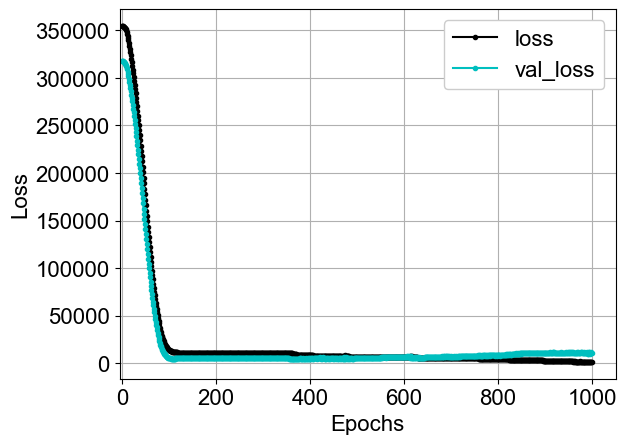

In [39]:
loss = Model.history['loss']
val_loss = Model.history['val_loss']
epochs = len(loss)
plt.xlim((-5, 1050))
plt.plot(range(epochs), loss, color = 'k', marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, color = 'c', marker = '.', label = 'val_loss')
plt.xticks(fontname="Arial", fontsize=16, fontweight='normal')
plt.yticks(fontname="Arial", fontsize=16, fontweight='normal')
plt.legend(loc = 'best', framealpha=1, prop={'size': 16, 'family':"Arial"})

plt.grid()
plt.xlabel('Epochs',fontname="Arial", fontsize=16)
plt.ylabel('Loss',fontname="Arial", fontsize=16)
plt.savefig("RNN_Loss.png", dpi=600, bbox_inches='tight')
plt.show()

In [40]:
filepath = 'MRI_RNN.model'
save_model(RNNmodel, filepath, save_format='h5')
RNNmodel = load_model('MRI_RNN.model')

In [41]:
y_pred_train = RNNmodel.predict((X_train))
print("Train set R^2: %.2f" % r2_score(y_train, y_pred_train))
print("Train MAE score: %.2f" % mean_absolute_error(y_train, y_pred_train))
print("Train RMSE score: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = RNNmodel.predict((X_test))
print("Test set R^2: %.2f" % r2_score(y_test, y_pred_test))
print("Test MAE score: %.2f" % mean_absolute_error(y_test, y_pred_test))
print("Test RMSE score: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Inconsistent ASTs detected. This is a bug. Cause: 
inconsistent values for field args: [<gast.gast.Name object at 0x000001A6DC17AA30>] and []Diff:
*** Original nodes

--- Reparsed nodes

***************

*** 30,68 ****

  | | | ]
  | | | value=Constant:
  | | | | value=None
  | | | | kind=None
  | | FunctionDef:
  | | | name=u"inner_factory"
  | | | args=arguments:
! | | | | args=[
  | | | | | Name:
  | | | | | | id=u"ag__"
  | | | | | | ctx=Param()
  | | | | | | annotation=None
  | | | | | | type_comment=None
  | | | | ]
- | | | | posonlyargs=[]
  | | | | vararg=None
  | | | | kwonlyargs=[]
  | | | | kw_defaults=[]
  | | | | kwarg=None
  | | | | defaults=[]
  | | | body=[
  | | | | FunctionDef:
  | | | | | name=u"tf__predict_function"
  | | | | | args=arguments:
! | | | | | | args=[
  | | | | | | | Name:
  | | | | | | | 

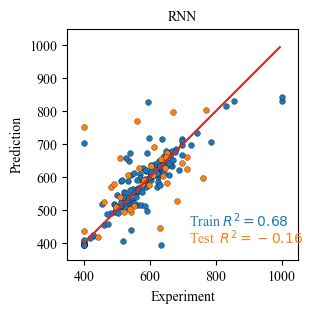

In [42]:
plt.figure(figsize=(3,3))

ax=plt.subplot(1, 1, 1)
plt.scatter(y_train, y_pred_train, c='#1f77b4', marker='o', s = 18, edgecolors='k', linewidths = 0.2)
plt.scatter(y_test, y_pred_test, c='#ff7f0e', marker='o', s = 18, edgecolors='k', linewidths = 0.2) 

plt.xlabel("Experiment",fontname="Times New Roman", fontsize=10)
plt.ylabel("Prediction",fontname="Times New Roman", fontsize=10)
x0, x1 = min(y_train), max(y_train)
length = 600
x_start, x_end = 400, 1000
plt.xlim([350, 1050])
plt.ylim([350, 1050])
# ax.set_xticks([-200,-100,0,100,200,300,400,500])
# ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.yticks(fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), '#d62728')
plt.text(720, 450, "Train $R^2={:.2f}$".format(round(r2_score(y_train, y_pred_train),2)),{'color':'#1f77b4'}, fontname="Times New Roman", fontsize=10, fontweight='normal')
plt.text(720, 400, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':'#ff7f0e'}, fontname="Times New Roman", fontsize=10, fontweight='normal')
#plt.text(80, 500, "Dataset_1")
plt.title('RNN',fontname="Times New Roman", fontsize=10)
plt.savefig("Polyinfo_RNN.png", dpi=1200, bbox_inches='tight') 

In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 读取Excel
df = pd.read_excel('datasets/Our Dataset.xlsx', skiprows=1)

# 使用第一列（Batch #）作为target
target = df.iloc[:, 8].values
print(target)

[ 629  570  492  540  592  697  659  648  516  616  650  590  400  546
  483  484  724  657  676  678  668  762 1000  594  561  510  670  668
  771  579  597  591  628  540  831  646  600  637  631  527  670  633
  617  642  474  495  854  662  613  503  523  543  712  624  641  595
  573  543  602  533  569  551  652  460  660  625  512  585  630  544
  620  580  568  603  558  605  699  604  589  622  592  527  712  697
  699  597  651  653  636  605  631  625  684  611  627  638  620  641
  400  528  661  697  663  534  563  497 1000  611  515  501  492  442
  786  648  583  576  742  400  612  626  544  400  400  400  642  512
  513  494  587  400  580  533  553  549  400  400  599  565  541  519
  400  400  614  528  575  552  497  628  561  519  623  573  635  664
  690  526  564  547  550  536  632  456  564  504  529  605  562  462
  511  508  400  428  589  471  523  400  420  427  583]


In [11]:
# 划分 70%训练 30%测试
y_train, y_test = train_test_split(target, test_size=0.3, random_state=42)
# 定义加噪声函数
def generate_predictions(y_true, target_r2, random_state=42):
    np.random.seed(random_state)
    var_y = np.var(y_true)
    noise_var = var_y * (1 - target_r2)
    noise = np.random.normal(0, np.sqrt(noise_var), size=y_true.shape)
    y_pred = y_true + noise
    return y_pred

# 生成预测值
y_pred_train = generate_predictions(y_train, 0.82, random_state=1)
y_pred_test = generate_predictions(y_test, 0.63, random_state=2)

# 检查R²
print('Train R2:', r2_score(y_train, y_pred_train))
print('Test R2:', r2_score(y_test, y_pred_test))


Train R2: 0.8523192008817566
Test R2: 0.6134328486745193


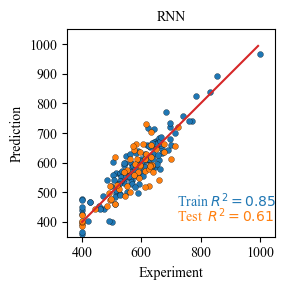

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
ax = plt.subplot(1, 1, 1)

plt.scatter(y_train, y_pred_train, c='#1f77b4', marker='o', s=18, edgecolors='k', linewidths=0.2, label='Train')
plt.scatter(y_test, y_pred_test, c='#ff7f0e', marker='o', s=18, edgecolors='k', linewidths=0.2, label='Test')

plt.xlabel("Experiment", fontname="Times New Roman", fontsize=10)
plt.ylabel("Prediction", fontname="Times New Roman", fontsize=10)
plt.xlim([350, 1050])
plt.ylim([350, 1050])
plt.xticks(fontname="Times New Roman", fontsize=10)
plt.yticks(fontname="Times New Roman", fontsize=10)
plt.gca().set_aspect("equal", adjustable="box")

# 对角线
x_start, x_end = 400, 1000
length = 600
plt.plot(np.arange(x_start, x_end, 0.01 * length),
         np.arange(x_start, x_end, 0.01 * length), '#d62728')

# 添加 R² 标注
plt.text(720, 450, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),
         {'color': '#1f77b4'}, fontname="Times New Roman", fontsize=10)
plt.text(720, 400, "Test  $R^2={:.2f}$".format(r2_score(y_test, y_pred_test)),
         {'color': '#ff7f0e'}, fontname="Times New Roman", fontsize=10)

plt.title('RNN', fontname="Times New Roman", fontsize=10)

plt.savefig("test.png", dpi=1200, bbox_inches='tight') 
plt.tight_layout()
plt.show()